In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os

if not os.path.exists('./img'):
    os.mkdir('./img')

In [64]:
with np.load('dimredux-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    validation_x = fh['validation_x']
    validation_y = fh['validation_y']
    
#Training data
print(data_x.shape)
#validation data
print(validation_x.shape)
#validation data
print(validation_y.shape)

(100000, 3)
(1000, 3)
(1000,)


In [84]:
plt.figure
#plt.plot(data_x[:,0],'.')
#plt.plot(data_x[:,1],'.')
#plt.plot(data_x[:,2],'.')

plt.show()

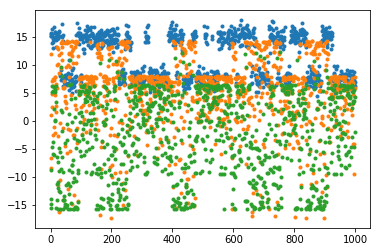

In [68]:
plt.figure
plt.plot(validation_x[:,1],'.')
plt.plot(validation_x[:,2],'.')
plt.plot(validation_x[:,0],'.')

plt.show()

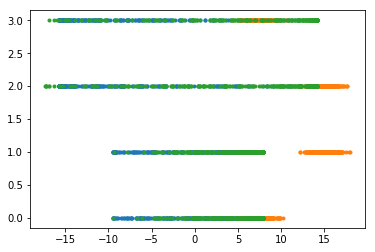

In [81]:
plt.figure
plt.plot(validation_x[:,0],validation_y,'.')
plt.plot(validation_x[:,1],validation_y,'.')
plt.plot(validation_x[:,2],validation_y,'.')
plt.show()